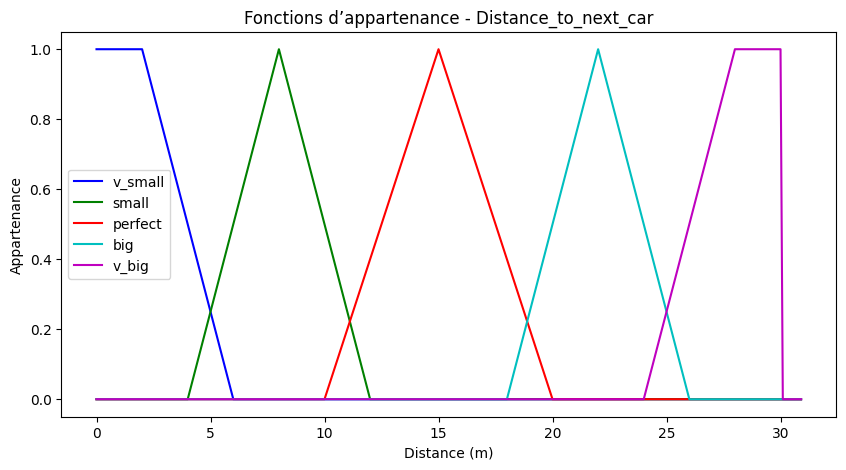

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Univers de discours
x_distance = np.arange(0, 31, 0.1)

# Fonctions d'appartenance
v_small = fuzz.trapmf(x_distance, [0, 0, 2, 6])
small = fuzz.trimf(x_distance, [4, 8, 12])
perfect = fuzz.trimf(x_distance, [10, 15, 20])
big = fuzz.trimf(x_distance, [18, 22, 26])
v_big = fuzz.trapmf(x_distance, [24, 28, 30, 30])

# Visualisation
plt.figure(figsize=(10,5))
plt.plot(x_distance, v_small, 'b', label='v_small')
plt.plot(x_distance, small, 'g', label='small')
plt.plot(x_distance, perfect, 'r', label='perfect')
plt.plot(x_distance, big, 'c', label='big')
plt.plot(x_distance, v_big, 'm', label='v_big')
plt.title('Fonctions d’appartenance - Distance_to_next_car')
plt.xlabel('Distance (m)')
plt.ylabel('Appartenance')
plt.legend()
plt.show()

exercice 2

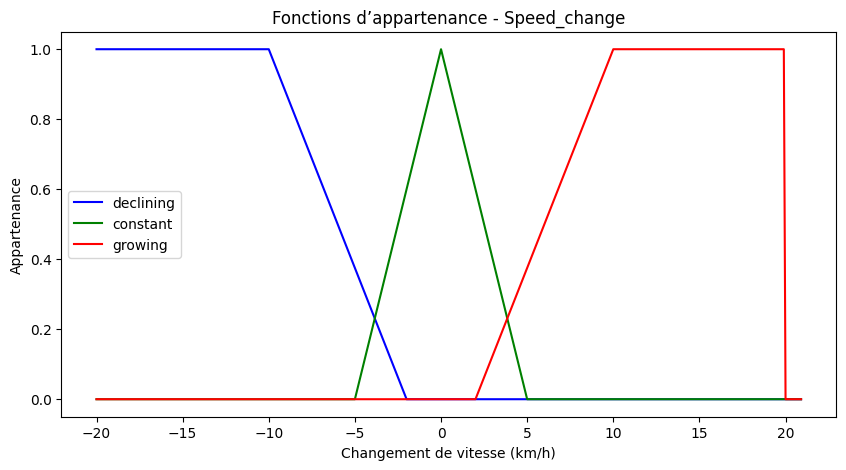

In [2]:
x_speed = np.arange(-20, 21, 0.1)

declining = fuzz.trapmf(x_speed, [-20, -20, -10, -2])
constant = fuzz.trimf(x_speed, [-5, 0, 5])
growing = fuzz.trapmf(x_speed, [2, 10, 20, 20])

plt.figure(figsize=(10,5))
plt.plot(x_speed, declining, 'b', label='declining')
plt.plot(x_speed, constant, 'g', label='constant')
plt.plot(x_speed, growing, 'r', label='growing')
plt.title('Fonctions d’appartenance - Speed_change')
plt.xlabel('Changement de vitesse (km/h)')
plt.ylabel('Appartenance')
plt.legend()
plt.show()

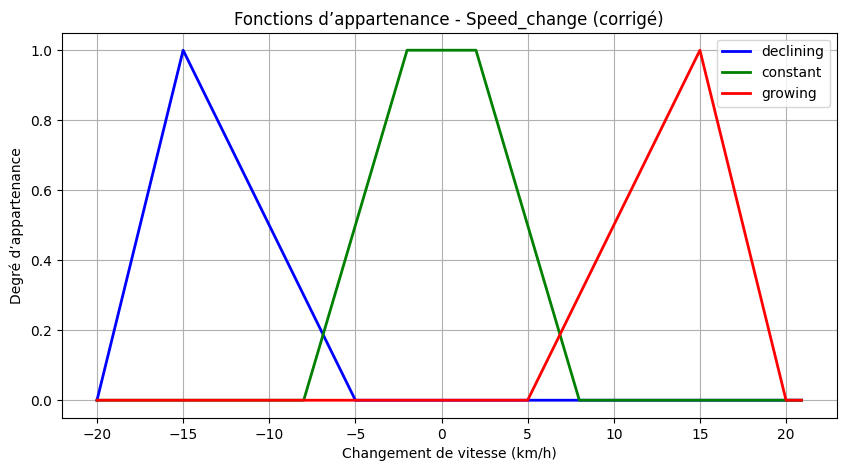

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Univers de discours
x_speed = np.arange(-20, 21, 0.1)

# Fonctions d’appartenance
declining = fuzz.trimf(x_speed, [-20, -15, -5])       # triangulaire à gauche
constant = fuzz.trapmf(x_speed, [-8, -2, 2, 8])       # trapézoïdale au centre
growing = fuzz.trimf(x_speed, [5, 15, 20])            # triangulaire à droite

# Visualisation
plt.figure(figsize=(10,5))
plt.plot(x_speed, declining, 'b', linewidth=2, label='declining')
plt.plot(x_speed, constant, 'g', linewidth=2, label='constant')
plt.plot(x_speed, growing, 'r', linewidth=2, label='growing')
plt.title('Fonctions d’appartenance - Speed_change (corrigé)')
plt.xlabel('Changement de vitesse (km/h)')
plt.ylabel('Degré d’appartenance')
plt.legend()
plt.grid(True)
plt.show()

exercice 3

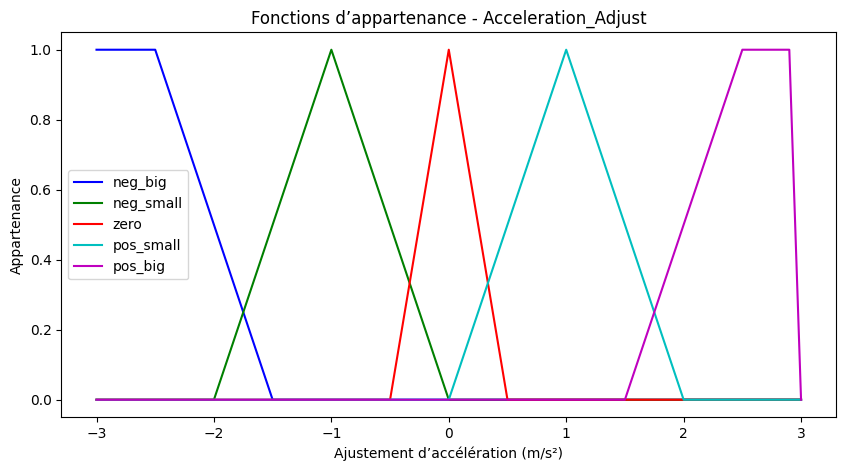

In [4]:
x_accel = np.arange(-3, 3.1, 0.1)

neg_big = fuzz.trapmf(x_accel, [-3, -3, -2.5, -1.5])
neg_small = fuzz.trimf(x_accel, [-2, -1, 0])
zero = fuzz.trimf(x_accel, [-0.5, 0, 0.5])
pos_small = fuzz.trimf(x_accel, [0, 1, 2])
pos_big = fuzz.trapmf(x_accel, [1.5, 2.5, 3, 3])

plt.figure(figsize=(10,5))
plt.plot(x_accel, neg_big, 'b', label='neg_big')
plt.plot(x_accel, neg_small, 'g', label='neg_small')
plt.plot(x_accel, zero, 'r', label='zero')
plt.plot(x_accel, pos_small, 'c', label='pos_small')
plt.plot(x_accel, pos_big, 'm', label='pos_big')
plt.title('Fonctions d’appartenance - Acceleration_Adjust')
plt.xlabel('Ajustement d’accélération (m/s²)')
plt.ylabel('Appartenance')
plt.legend()
plt.show()

exercice 4


Résultat de l’ajustement d’accélération :  0.2442539484621783


c:\Python\Python313\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


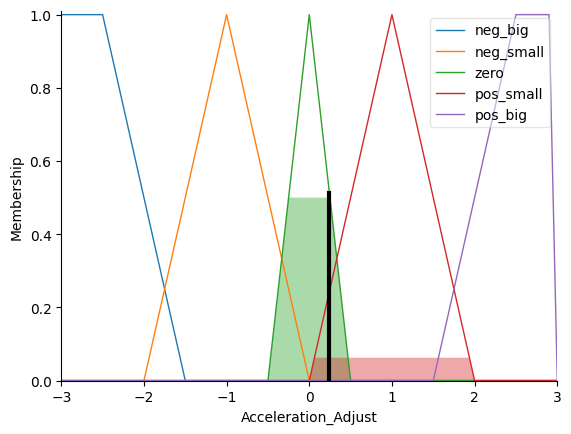

In [5]:
import skfuzzy.control as ctrl

# Variables floues
Distance = ctrl.Antecedent(np.arange(0, 31, 0.1), 'Distance_to_next_car')
SpeedChange = ctrl.Antecedent(np.arange(-20, 21, 0.1), 'Speed_change')
Acceleration = ctrl.Consequent(np.arange(-3, 3.1, 0.1), 'Acceleration_Adjust')

# Fonctions d’appartenance
Distance['v_small'] = fuzz.trapmf(Distance.universe, [0, 0, 2, 6])
Distance['small'] = fuzz.trimf(Distance.universe, [4, 8, 12])
Distance['perfect'] = fuzz.trimf(Distance.universe, [10, 15, 20])
Distance['big'] = fuzz.trimf(Distance.universe, [18, 22, 26])
Distance['v_big'] = fuzz.trapmf(Distance.universe, [24, 28, 30, 30])

SpeedChange['declining'] = fuzz.trapmf(SpeedChange.universe, [-20, -20, -10, -2])
SpeedChange['constant'] = fuzz.trimf(SpeedChange.universe, [-5, 0, 5])
SpeedChange['growing'] = fuzz.trapmf(SpeedChange.universe, [2, 10, 20, 20])

Acceleration['neg_big'] = fuzz.trapmf(Acceleration.universe, [-3, -3, -2.5, -1.5])
Acceleration['neg_small'] = fuzz.trimf(Acceleration.universe, [-2, -1, 0])
Acceleration['zero'] = fuzz.trimf(Acceleration.universe, [-0.5, 0, 0.5])
Acceleration['pos_small'] = fuzz.trimf(Acceleration.universe, [0, 1, 2])
Acceleration['pos_big'] = fuzz.trapmf(Acceleration.universe, [1.5, 2.5, 3, 3])

# Règles floues
rule1 = ctrl.Rule(Distance['v_small'] & SpeedChange['declining'], Acceleration['neg_small'])
rule2 = ctrl.Rule(Distance['v_small'] & SpeedChange['constant'], Acceleration['neg_big'])
rule3 = ctrl.Rule(Distance['v_small'] & SpeedChange['growing'], Acceleration['neg_big'])
rule4 = ctrl.Rule(Distance['small'] & SpeedChange['declining'], Acceleration['zero'])
rule5 = ctrl.Rule(Distance['small'] & SpeedChange['constant'], Acceleration['neg_small'])
rule6 = ctrl.Rule(Distance['small'] & SpeedChange['growing'], Acceleration['neg_big'])
rule7 = ctrl.Rule(Distance['perfect'] & SpeedChange['declining'], Acceleration['pos_small'])
rule8 = ctrl.Rule(Distance['perfect'] & SpeedChange['constant'], Acceleration['zero'])
rule9 = ctrl.Rule(Distance['perfect'] & SpeedChange['growing'], Acceleration['neg_small'])
rule10 = ctrl.Rule(Distance['big'] & SpeedChange['declining'], Acceleration['pos_big'])
rule11 = ctrl.Rule(Distance['big'] & SpeedChange['constant'], Acceleration['pos_small'])
rule12 = ctrl.Rule(Distance['big'] & SpeedChange['growing'], Acceleration['zero'])
rule13 = ctrl.Rule(Distance['v_big'] & SpeedChange['declining'], Acceleration['pos_big'])
rule14 = ctrl.Rule(Distance['v_big'] & SpeedChange['constant'], Acceleration['pos_big'])
rule15 = ctrl.Rule(Distance['v_big'] & SpeedChange['growing'], Acceleration['pos_small'])

# Système de contrôle
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7,
                             rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])

sim = ctrl.ControlSystemSimulation(system)

# Simulation pour les valeurs demandées
sim.input['Distance_to_next_car'] = 13
sim.input['Speed_change'] = -2.5
sim.compute()

print("Résultat de l’ajustement d’accélération : ", sim.output['Acceleration_Adjust'])
Acceleration.view(sim=sim)

TP2

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

# --- Variables floues ---
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'Distance_to_next_car')
speed_change = ctrl.Antecedent(np.arange(-20, 21, 1), 'Speed_change')
acceleration = ctrl.Consequent(np.arange(-1, 1.1, 0.1), 'Acceleration_Adjust')

# --- Fonctions d'appartenance ---
distance['near'] = fuzz.trimf(distance.universe, [0, 0, 40])
distance['medium'] = fuzz.trimf(distance.universe, [20, 50, 80])
distance['far'] = fuzz.trimf(distance.universe, [60, 100, 100])

speed_change['decreasing'] = fuzz.trimf(speed_change.universe, [-20, -20, 0])
speed_change['stable'] = fuzz.trimf(speed_change.universe, [-5, 0, 5])
speed_change['increasing'] = fuzz.trimf(speed_change.universe, [0, 20, 20])

acceleration['brake'] = fuzz.trimf(acceleration.universe, [-1, -1, 0])
acceleration['maintain'] = fuzz.trimf(acceleration.universe, [-0.2, 0, 0.2])
acceleration['accelerate'] = fuzz.trimf(acceleration.universe, [0, 1, 1])

# --- Règles floues ---
rule1 = ctrl.Rule(distance['near'] & speed_change['decreasing'], acceleration['maintain'])
rule2 = ctrl.Rule(distance['near'] & speed_change['stable'], acceleration['brake'])
rule3 = ctrl.Rule(distance['near'] & speed_change['increasing'], acceleration['brake'])
rule4 = ctrl.Rule(distance['medium'] & speed_change['decreasing'], acceleration['accelerate'])
rule5 = ctrl.Rule(distance['medium'] & speed_change['stable'], acceleration['maintain'])
rule6 = ctrl.Rule(distance['medium'] & speed_change['increasing'], acceleration['brake'])
rule7 = ctrl.Rule(distance['far'] & speed_change['decreasing'], acceleration['accelerate'])
rule8 = ctrl.Rule(distance['far'] & speed_change['stable'], acceleration['accelerate'])
rule9 = ctrl.Rule(distance['far'] & speed_change['increasing'], acceleration['maintain'])

# --- Système flou ---
accel_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
accel_sim = ctrl.ControlSystemSimulation(accel_ctrl)

# --- Génération du dataset synthétique ---
np.random.seed(42)
distances = np.random.uniform(0, 100, 1000)
speed_changes = np.random.uniform(-20, 20, 1000)
accels = []

for d, s in zip(distances, speed_changes):
    accel_sim.input['Distance_to_next_car'] = d
    accel_sim.input['Speed_change'] = s
    accel_sim.compute()
    accels.append(accel_sim.output['Acceleration_Adjust'])

# --- Dataset ---
df = pd.DataFrame({
    'Distance_to_next_car': distances,
    'Speed_change': speed_changes,
    'Acceleration_Adjust': accels
})

print(df.head())


   Distance_to_next_car  Speed_change  Acceleration_Adjust
0             37.454012    -12.594683             0.600358
1             95.071431      1.676038             0.607734
2             73.199394     14.917833            -0.369062
3             59.865848      9.288995            -0.604406
4             15.601864     12.262446            -0.630184


Entraînement d’un modèle de régression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Séparation en train/test
X = df[['Distance_to_next_car', 'Speed_change']]
y = df['Acceleration_Adjust']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle ML
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)


Évaluation du modèle

In [3]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Erreur absolue moyenne (MAE) : {mae:.4f}")
print(f"Erreur quadratique moyenne (MSE) : {mse:.4f}")


Erreur absolue moyenne (MAE) : 0.0090
Erreur quadratique moyenne (MSE) : 0.0005


Conclusion – Avantages respectifs
- Avantages de la logique floue

Explicable et intuitive : on comprend les décisions du système.

Basée sur la connaissance humaine (expertise).

Simple à implémenter pour des règles claires et des environnements bien définis.

- Avantages du Machine Learning

Capacité à apprendre automatiquement à partir de données réelles.

Souvent plus précis que les systèmes flous pour des problèmes complexes.

S’adapte aux changements sans devoir reformuler les règles.